In [1]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Digits dataset
filename = 'C://train_r//data//data0-1(개별질병).csv'

data = pd.read_csv(filename)
data


,질병,외부 외형 여윔,외부 외형 기형,"외부 체표 출혈, 괴사",외부 체표 궤양,외부 체표 흑화,외부 체표 림프 종양,외부 체표 색소포 \n괴사,외부 안구 혼탁,외부 안구 돌출,...,내부 장기 유착,내부 장기 지방조직 출혈,내부 방광 팽만,내부 방광 염증,내부 심장 비대,내부 심장 염증,환수량(회전/일),전장(cm),중량(g),사육밀도(kg/m^2)
0,연쇄구균병,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,35.0,78,257.0
1,기타질병,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0
2,연쇄구균병,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.5,30,0.0
3,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0
4,기타질병,Y,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,...,Y,NaN,NaN,Y,Y,NaN,60.0,70.0,80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,23.5,166,15.0
768,스쿠티카병,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,24.7,172,15.0
769,기타질병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,23.0,192,15.0
770,스쿠티카병,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.0,24.0,112,15.0


In [2]:
data = data.fillna(0)
data = data.replace('Y', 1)
data.질병.replace(['기타질병', '비브리오병', '연쇄구균병', '스쿠티카병', 
       '정상', '활주세균병', '에드워드병', 'VHSV'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)

Accuracy: 49.57%


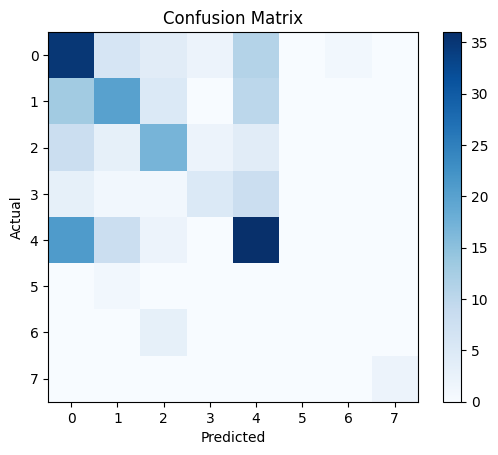

In [3]:
x = data.drop(['질병'], axis=1)
y = data['질병']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

# Create the random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Test the classifier on the test data
accuracy = clf.score(x_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Generate the confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Users\AI_2\anaconda3\envs\python41\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AI_2\anaconda3\envs\python41\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AI_2\anaconda3\envs\python41\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AI_2\an

Precision: 49.76%
Recall: 49.57%
F1 Score: 48.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.59      0.50        59
           1       0.51      0.42      0.46        48
           2       0.53      0.50      0.52        34
           3       0.56      0.28      0.37        18
           4       0.52      0.54      0.53        67
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         2

    accuracy                           0.50       232
   macro avg       0.44      0.42      0.42       232
weighted avg       0.50      0.50      0.49       232



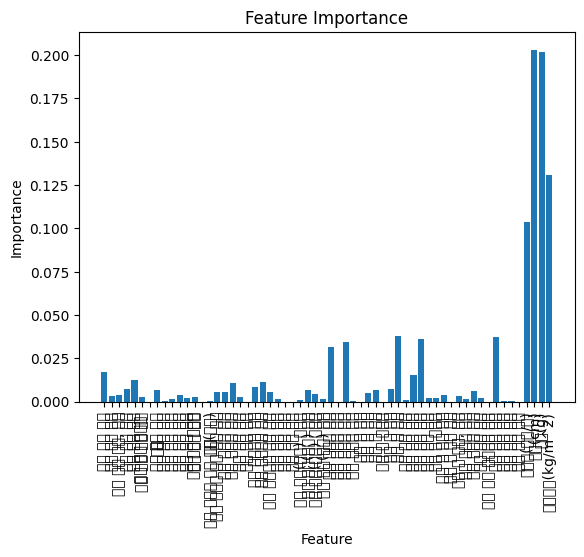

In [4]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importance = clf.feature_importances_

plt.bar(x=x_train.columns, height=importance)
plt.title("Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()